In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8910045012864862651, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11297803469
 locality {
   bus_id: 1
 }
 incarnation: 4122465078757566685
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [3]:
!pip install gensim
import gensim, logging
from gensim.models.word2vec import Word2Vec 

In [4]:
!pip install -U -q PyDrive
!pip install pickle
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pickle

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'1S96PP4Pe_LxahlU-Co8foL2DzZE2bKo9' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)
  if fname == '/content/data/model.bin':
    model = Word2Vec.load(fname) #word2vec model
  if fname == '/content/data/Documents.pickle':
    with open(fname, 'rb') as f:
      Documents = pickle.load(f)
  
    



  Could not find a version that satisfies the requirement pickle (from versions: )
No matching distribution found for pickle
title: Documents.pickle, id: 1lUEORk5uwHRm6JkTYoGAK3JaRBd7FU9k
downloading to /content/data/Documents.pickle
title: model.bin, id: 1xjpW0CDroJyCC_RYI5CroSoZ6MosAZlL
downloading to /content/data/model.bin
title: y_train.npy, id: 1WV2aWz1yjPOkrnKqpQX2KYN4S5WcjrL2
downloading to /content/data/y_train.npy


# Load model Word2Vec

In [5]:
print(model['good'])

[-1.7942369  -0.33382452  0.5339357  -1.4902467   2.1332428  -1.0774956
 -0.21262288  0.34546664  0.18661968  0.5688681  -0.42535612 -1.4686878
  0.93791354 -2.3718512  -0.70141095 -0.9795086  -0.20312025 -1.0589772
  0.24206859 -1.1336994   1.6416202  -0.6261653   0.84927803 -0.4769663
  0.9985494   2.1509867  -1.1989815  -0.41598585 -0.09528159 -0.7134422
  1.7122741   0.5545024   1.277535    1.1946003   0.40057173  0.09237026
  0.4424268   1.0867667   0.90509695 -0.19481269  0.91103834  1.1511343
 -0.06785039 -1.4012144  -1.4653159   2.5017827  -0.34803048  0.43969256
 -0.88642263  0.0435985   0.38556442 -0.5132431   0.47357002  0.9714809
 -1.6138848   1.6057731  -1.0455496  -0.12987329 -0.04974201  1.3797334
 -0.5297085  -1.210395   -0.49806824  2.032588    1.1804183  -0.10756348
 -0.62049466  0.31814304  0.93198586 -0.41446197 -0.50262237  0.6320385
  0.2493732   1.0782746   0.12296637 -0.33538577 -0.5217311  -1.2326243
 -0.45114192 -1.5398091  -0.46345225  2.1170738   0.02449238 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


# Load Document

In [6]:
print(Documents[1])

(['This', 'cd', 'storage', 'unit', 'isnt', 'greatest', 'cd', 'rack', 'want', 'something', 'job', 'isnt', 'costly', 'thing', 'made', 'plasti'], 'neg')


### Prepare our input this time :
-  the Training shape will be (M,100,n) where M is number of **exemple** ,100 each word dimension and n is the number of words in each sentence

In [7]:
def get_Max_Min_length_Sent():
    Max = 0
    Min = 10
    CountSup50 = 0
    CountSup100 = 0
    CountSup200 = 0
    CountSup300 = 0
    CountSup400 = 0
    for S,t in Documents:
        if len(S) > Max:
            Max = len(S)
        if len(S) < Min :
            Min = len(S)
        if len(S) > 50:
            CountSup50 +=1
        if len(S) > 100:
            CountSup100 +=1
        if len(S) >200 :
            CountSup200 +=1
        if len(S) > 300:
            CountSup300 +=1
        if len(S) >400 :
            CountSup400 +=1
            
    return Max,Min,CountSup50,CountSup100,CountSup200,CountSup300,CountSup400

Max,Min,CountSup50,CountSup100,CountSup200,CountSup300,CountSup400 = get_Max_Min_length_Sent()
print("Max length sentence is :",Max,"Min length sentence is :",Min)
print("Sentence with more than 50 word ",CountSup50)
print("Sentence with more than 100 word ",CountSup100)
print("Sentence with more than 200 word ",CountSup200)
print("Sentence with more than 300 word ",CountSup300)
print("Sentence with more than 400 word ",CountSup400)



Max length sentence is : 506 Min length sentence is : 2
Sentence with more than 50 word  8366
Sentence with more than 100 word  1373
Sentence with more than 200 word  92
Sentence with more than 300 word  18
Sentence with more than 400 word  6


### fix_sentence_length is a function to fix the size of sentences to a fixed size to feed them into the neural net with specific length sentences with length less than that will be extended with zeros this process don't affect the alogrithme and sentences with length more that the specified length will be truncated

In [8]:
def fix_sentence_length(length,exemple):
    if len(exemple) > length:
        exemple = exemple[:length]
    elif len(exemple) < length:
        for i in range(length - len(exemple)):
            listzeros = [0] * 100
            exemple.append(listzeros)
    return exemple
ex = [2,5,4,8,7]
ex = fix_sentence_length(7,ex)
print(ex) 

[2, 5, 4, 8, 7, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [0]:
def Sent_Embeding_sequence(words,Documents):
    X_SentsEmb = []
    y_SentsEmb = []
    #on Va récuperer l'embeding de chaque sentence avec l'average des vecteur qui le compose
    for S,t in Documents: #S est la phrase , t est la class
        #Average of embeding of all words in sentence
        Sent = []
        Sent = [list(model[m]) for m in S]
#        if len(Sent) < 100:
#            for i in range(100 - len(Sent)):
#                Sent.append(0) # pour avoir une longeur standart de 100 mots par Sent
#        else :
#            Sent = Sent[:100]
        #Add Sentence Vector to list
        Sent = fix_sentence_length(100,Sent)
        X_SentsEmb.append(Sent)
        #Add label to y_SentEmb
        if t == 'neg':
            y_SentsEmb.append(0)
        elif t == 'pos':
            y_SentsEmb.append(1)
        else:
            print('No match label !!! ',t)
    return X_SentsEmb,y_SentsEmb

In [10]:
words = list(model.wv.vocab)
X,Y = Sent_Embeding_sequence(words,Documents)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [11]:
import numpy as np
X_a = np.array(X)
del X
#lista = np.reshape(lista, (len(lista),2, 3))
print("X Shape",X_a.shape)


X Shape (38252, 100, 100)


In [0]:
from sklearn.model_selection import train_test_split
#train test
X_train, X_test, y_train, y_test = train_test_split(X_a, Y, test_size=0.15, random_state=1)
#train dev
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1)

In [13]:
print('length X_train :',len(X_train))
print('length y_train :',len(y_train))
print('length X_test :',len(X_test))
print('length y_test :',len(y_test))
print('length X_val :',len(X_val))
print('length y_val :',len(y_val))

length X_train : 27636
length y_train : 27636
length X_test : 5738
length y_test : 5738
length X_val : 4878
length y_val : 4878


## LSTM
#### On Batch Size

A benefit of using Keras is that it is built on top of symbolic mathematical libraries such as TensorFlow and Theano for fast and efficient computation. This is needed with large neural networks.

A downside of using these efficient libraries is that you must define the scope of your data upfront and for all time. Specifically, the batch size.

The batch size limits the number of samples to be shown to the network before a weight update can be performed. This same limitation is then imposed when making predictions with the fit model.

Specifically, the batch size used when fitting your model controls how many predictions you must make at a time.

This is often not a problem when you want to make the same number predictions at a time as the batch size used during training.
## 1st batch learning:
- working on the whole dataset to perform learning
- Batch gradient descent is a variation of the gradient descent algorithm that calculates the error for each example in the training dataset, but only updates the model after all training examples have been evaluated.
-  (+) Fewer updates to the model means this variant of gradient descent is more computationally efficient than stochastic gradient descent
-  (-) Model updates, and in turn training speed, may become very slow for large datasets.



In [0]:
X_train.shape[0]

27636

In [16]:
from keras.models import Sequential
from keras.layers import Embedding,LSTM
from keras.layers.core import Dense,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.optimizers import SGD,Adam,Nadam
from keras import callbacks
embed_dim = 100
lstm_out = 100


modelBatch = Sequential()
modelBatch.add(LSTM(lstm_out, input_shape=(X_a.shape[1], X_a.shape[2])))# dropout_U = 0.2, dropout_W = 0.2)
modelBatch.add(Dense(1,activation='sigmoid'))
modelBatch.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])
print(modelBatch.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 80,501
Trainable params: 80,501
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
historyBatch = modelBatch.fit(X_train, y_train, nb_epoch = 20)

/usr/local/lib/python3.6/dist-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
27636/27636 [==============================] - 146s 5ms/step - loss: 0.2447 - binary_accuracy: 0.5749
Epoch 2/20
  992/27636 [>.............................] - ETA: 2:20 - loss: 0.2411 - binary_accuracy: 0.597827636/27636 [==============================] - 146s 5ms/step - loss: 0.2439 - binary_accuracy: 0.5777
Epoch 3/20
 2944/27636 [==>...........................] - ETA: 2:09 - loss: 0.2417 - binary_accuracy: 0.588727636/27636 [==============================] - 146s 5ms/step - loss: 0.2438 - binary_accuracy: 0.5773
Epoch 4/20
 3840/27636 [===>..........................] - ETA: 2:05 - loss: 0.2438 - binary_accuracy: 0.575527636/27636 [==============================] - 146s 5ms/step - loss: 0.2351 - binary_accuracy: 0.6013
Epoch 5/20
 4256/27636 [===>..........................] - ETA: 2:02 - loss: 0.2049 - binary_accuracy: 0.670827636/27636 [==============================] - 146s 5ms/step - loss: 0.1979 - binary_accuracy: 0.6890
Epoch 6/20
 4448/27636 [===>...................

In [18]:
scoreBatch = modelBatch.evaluate(np.array(X_val),y_val)

4878/4878 [==============================] - 7s 1ms/step


In [19]:
scoreBatch

[0.1689953310548795, 0.775932759278717]

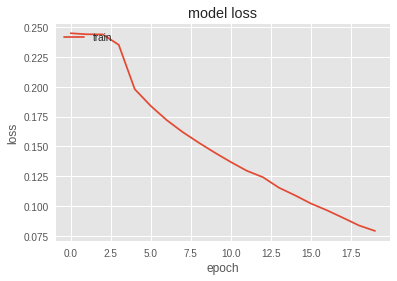

In [21]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

plt.plot(historyBatch.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

### Save Batch LSTM model

In [0]:
from keras.models import load_model
modelBatch.save('LSTMBatch_Model.h5')  # creates a HDF5 file 'my_model.h5'
del modelBatch  # deletes the existing model

# returns a compiled model
# identical to the previous one
modelBatch = load_model('LSTMBatch_Model.h5')

In [23]:
modelBatch.evaluate(np.array(X_val),y_val)


4878/4878 [==============================] - 7s 1ms/step


[0.1689953310548795, 0.775932759278717]

In [0]:
del modelBatch

In [0]:
from google.colab import files
files.download('LSTMBatch_Model.h5')

### LSTM : 1 Layer Mini batch gradient decent
-  100 neurones
-  batch size 128
-  Mini-batch gradient descent is the recommended variant of gradient descent for most applications, especially in deep learning.
-  Mini-batch sizes, commonly called “batch sizes” for brevity, are often tuned to an aspect of the computational architecture on which the implementation is being executed. Such as a power of two that fits the memory requirements of the GPU or CPU hardware like 32, 64, 128, 256, and so on.


In [0]:
lstm_out = 100
batch_size = 128

model = Sequential()
model.add(LSTM(lstm_out, input_shape=(X_a.shape[1], X_a.shape[2]), dropout_U = 0.2, dropout_W = 0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])
print(model.summary())
history128 = model.fit(X_train, y_train, batch_size = batch_size, nb_epoch = 100)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(100, input_shape=(100, 100), dropout=0.2, recurrent_dropout=0.2)`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 101       
Total params: 80,501
Trainable params: 80,501
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.6/dist-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
27636/27636 [==============================] - 42s 2ms/step - loss: 0.2447 - binary_accuracy: 0.5763
Epoch 2/100
27636/27636 [==============================] - 41s 1ms/step - loss: 0.2420 - binary_accuracy: 0.5848
Epoch 3/100
10496/27636 [==========>...................] - ETA: 25s - loss: 0.2403 - binary_accuracy: 0.600727636/27636 [==============================] - 41s 2ms/step - loss: 0.2437 - binary_accuracy: 0.5816
Epoch 4/100
27636/27636 [==============================] - 41s 1ms/step - loss: 0.2445 - binary_accuracy: 0.5770
Epoch 5/100
16512/27636 [================>.............] - ETA: 16s - loss: 0.2439 - binary_accuracy: 0.577827636/27636 [==============================] - 41s 1ms/step - loss: 0.2440 - binary_accuracy: 0.5774
Epoch 6/100
27636/27636 [==============================] - 41s 1ms/step - loss: 0.2426 - binary_accuracy: 0.5801
Epoch 7/100
18304/27636 [==================>...........] - ETA: 13s - loss: 0.2287 - binary_accuracy: 0.624327636/27636 [=========

18304/27636 [==================>...........] - ETA: 13s - loss: 0.1165 - binary_accuracy: 0.837527636/27636 [==============================] - 41s 1ms/step - loss: 0.1176 - binary_accuracy: 0.8350
Epoch 54/100
27636/27636 [==============================] - 41s 1ms/step - loss: 0.1162 - binary_accuracy: 0.8377
Epoch 55/100
18176/27636 [==================>...........] - ETA: 14s - loss: 0.1173 - binary_accuracy: 0.836727636/27636 [==============================] - 41s 1ms/step - loss: 0.1175 - binary_accuracy: 0.8367
Epoch 56/100
27636/27636 [==============================] - 41s 1ms/step - loss: 0.1143 - binary_accuracy: 0.8405
Epoch 57/100
18048/27636 [==================>...........] - ETA: 14s - loss: 0.1178 - binary_accuracy: 0.834527636/27636 [==============================] - 41s 1ms/step - loss: 0.1167 - binary_accuracy: 0.8368
Epoch 58/100
27636/27636 [==============================] - 41s 1ms/step - loss: 0.1124 - binary_accuracy: 0.8449
Epoch 59/100
18432/27636 [===============

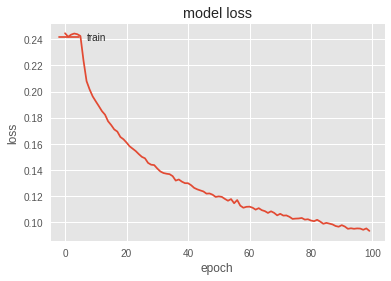

In [0]:
plt.plot(history128.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [0]:
score128 = model.evaluate(np.array(X_val),y_val)

4878/4878 [==============================] - 8s 2ms/step


### 79% on validation best performence until now

In [0]:
score128

[0.14789183973019707, 0.7939729397782735]

### Let's try on test data now
-  with all test exemples except one to see if the model can predict one exemple at a time
-  we keep the last exemple of test

In [0]:
len(X_test[:-1])

5737

In [0]:
score128_test = model.evaluate(np.array(X_test[:-1]),y_test[:-1])

5737/5737 [==============================] - 9s 2ms/step


In [0]:
score128_test

[0.14900220963043556, 0.7937946662226267]

In [0]:
score128_test_one = model.evaluate(np.array(X_test[-1:]),y_test[-1:])

1/1 [==============================] - 0s 44ms/step


In [0]:
score128_test_one

[0.1409723162651062, 1.0]

In [0]:
predict_128 = model.predict_classes(np.array(X_test[:-1]))

In [0]:
predict_128

array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [0]], dtype=int32)

In [0]:
predict_128_one = model.predict_classes(np.array(X_test[-1:]))

In [0]:
print("predicted :",predict_128_one,"true label",y_test[-1:])

predicted : [[0]] true label [0]


In [0]:
model.save('LSTM_Model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('LSTM_Model.h5')

In [0]:
from google.colab import files
files.download('LSTM_Model.h5')

### Stacked LSTM layer
-  Now we try 3 stacked LSTM layer

In [28]:
lstm_out = 100
batch_size = 128

model3L = Sequential()
model3L.add(LSTM(lstm_out,return_sequences=True, input_shape=(X_a.shape[1], X_a.shape[2])))#dropout_U = 0.2, dropout_W = 0.2)
model3L.add(LSTM(32, return_sequences=True))  # returns a sequence of vectors of dimension 32
model3L.add(LSTM(32))  # return a single vector of dimension 32
model3L.add(Dense(1,activation='sigmoid'))
model3L.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])
print(model3L.summary())
history128_3Layer = model3L.fit(X_train, y_train, batch_size = batch_size, nb_epoch = 20)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100, 100)          80400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 32)           17024     
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 105,777
Trainable params: 105,777
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.6/dist-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
27636/27636 [==============================] - 110s 4ms/step - loss: 0.2441 - binary_accuracy: 0.5754
Epoch 2/20
27636/27636 [==============================] - 110s 4ms/step - loss: 0.2446 - binary_accuracy: 0.5757
Epoch 3/20
11008/27636 [==========>...................] - ETA: 1:06 - loss: 0.2442 - binary_accuracy: 0.577327636/27636 [==============================] - 110s 4ms/step - loss: 0.2445 - binary_accuracy: 0.5755
Epoch 4/20
27636/27636 [==============================] - 110s 4ms/step - loss: 0.2444 - binary_accuracy: 0.5755
Epoch 5/20
16512/27636 [================>.............] - ETA: 44s - loss: 0.2443 - binary_accuracy: 0.576127636/27636 [==============================] - 110s 4ms/step - loss: 0.2444 - binary_accuracy: 0.5755
Epoch 6/20
27636/27636 [==============================] - 110s 4ms/step - loss: 0.2444 - binary_accuracy: 0.5755
Epoch 7/20
18176/27636 [==================>...........] - ETA: 37s - loss: 0.2442 - binary_accuracy: 0.576527636/27636 [=========

In [29]:
score3L = model3L.evaluate(np.array(X_val),y_val)

4878/4878 [==============================] - 17s 4ms/step


In [30]:
score3L

[0.15905393698558595, 0.7621976219517816]

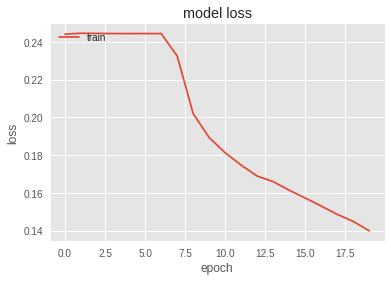

In [32]:
plt.plot(history128_3Layer.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

#### Save LSTM stacked 3L model

In [0]:
model3L.save('LSTM3L_Model.h5')  # creates a HDF5 file 'my_model.h5'
del model3L # deletes the existing model

# returns a compiled model
# identical to the previous one
model3L = load_model('LSTM3L_Model.h5')

In [0]:
from google.colab import files
files.download('LSTM3L_Model.h5')

### CNN + LSTM
-  From Dimensional Sentiment Analysis Using a Regional CNN-LSTM Model paper https://www.aclweb.org/anthology/P/P16/P16-2037.pdf
-  the  overall  framework  of  the  proposed  regional  CNN-LSTM  model.  First,  the  word  vectors  of  vocabulary words  are  trained from  a  large  corpus  using  the word2vec toolkit. For each given text, the regional CNN model uses a sentence as a region to divide the given text into R regions,  i.e. r1,...,ri rj, rk,..., rR.In  each region, useful  affective features  can  be  extracted once  the  word  vectors  sequentially pass  through a  convolutional  layer  and  maxpooling  layer.  Such local  (regional) features  are  then  sequentially integrated across  regions  using  LSTM to build a text vector for VA prediction.


In [41]:
from keras.layers import Conv1D,MaxPooling1D
modelCNNLSTM = Sequential()

modelCNNLSTM.add(Conv1D(filters=100, kernel_size=3, input_shape=(X_a.shape[1], X_a.shape[2]), padding='same', activation='relu'))
modelCNNLSTM.add(MaxPooling1D(pool_size=2))
modelCNNLSTM.add(LSTM(100))
modelCNNLSTM.add(Dense(1, activation='sigmoid'))
modelCNNLSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(modelCNNLSTM.summary())
HistoryCNNLSTM = modelCNNLSTM.fit(X_train, y_train, epochs=20, batch_size=128)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 100, 100)          30100     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 50, 100)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 110,601
Trainable params: 110,601
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
12928/27636 [=============>................] - ETA: 13s - loss: 0.6715 - acc: 0.591727636/27636 [==============================] - 24s 859us/step - loss: 0.6407 - acc: 0.6275
Epoch 2/20
27636/27636 [==============================] - 23s 829us/step - lo

In [42]:
scoreCNNLSTM = modelCNNLSTM.evaluate(np.array(X_val),y_val)

4878/4878 [==============================] - 4s 834us/step


In [43]:
scoreCNNLSTM

[0.6485775013398127, 0.7712177122259981]

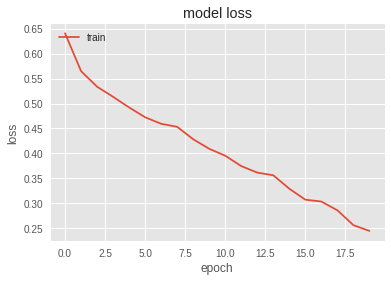

In [44]:
plt.plot(HistoryCNNLSTM.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

### CNN + LSTM Model

In [0]:
modelCNNLSTM.save('CNNLSTM_Model.h5')  # creates a HDF5 file 'my_model.h5'
del modelCNNLSTM  # deletes the existing model

# returns a compiled model
# identical to the previous one
modelCNNLSTM = load_model('CNNLSTM_Model.h5')

In [0]:
from google.colab import files
files.download('CNNLSTM_Model.h5')

## bidirectional LSTM
-  The idea of Bidirectional Recurrent Neural Networks (RNNs) is straightforward.
-  It involves duplicating the first recurrent layer in the network so that there are now two layers side-by-side, then providing the input sequence as-is as input to the first layer and providing a reversed copy of the input sequence to the second.

In [54]:
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb



maxlen = 100
batch_size = 128



modelBiLstm = Sequential()
modelBiLstm.add(Bidirectional(LSTM(64), input_shape=(X_a.shape[1], X_a.shape[2])))
modelBiLstm.add(Dropout(0.5))
modelBiLstm.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
modelBiLstm.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
print(modelBiLstm.summary())
print('Train...')
historyBilstm = modelBiLstm.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=15,
validation_data=[X_val, y_val])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection (None, 128)               84480     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 84,609
Trainable params: 84,609
Non-trainable params: 0
_________________________________________________________________
None
Train...
Train on 27636 samples, validate on 4878 samples
Epoch 1/15
14080/27636 [==============>...............] - ETA: 36s - loss: 0.6319 - acc: 0.638127636/27636 [==============================] - 76s 3ms/step - loss: 0.6107 - acc: 0.6597 - val_loss: 0.5810 - val_acc: 0.6835
Epoch 2/15
27636/27636 [==============================] - 74s 3ms/step - loss: 0.5611 - acc: 0.7044 - val_loss: 0.5664

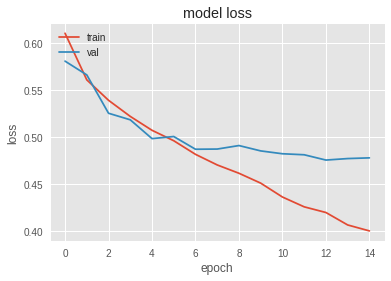

In [55]:
plt.plot(historyBilstm.history['loss'])
plt.plot(historyBilstm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

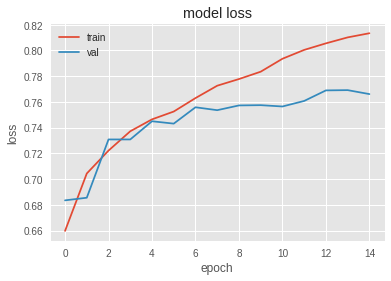

In [56]:
plt.plot(historyBilstm.history['acc'])
plt.plot(historyBilstm.history['val_acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [57]:
scoreBiLSTM = modelBiLstm.evaluate(np.array(X_val),y_val)

4878/4878 [==============================] - 12s 2ms/step


In [58]:
scoreBiLSTM

[0.4781140277453161, 0.7660926609266092]

In [59]:
modelBiLstm.evaluate(np.array(X_test),y_test)

5738/5738 [==============================] - 15s 3ms/step


[0.4881193633277311, 0.7689090275565021]

In [0]:
modelBiLstm.save('BILSTM_Model.h5')  # creates a HDF5 file 'my_model.h5'
del modelBiLstm  # deletes the existing model

# returns a compiled model
# identical to the previous one
modelBiLstm = load_model('BILSTM_Model.h5')

In [0]:
from google.colab import files
files.download('BILSTM_Model.h5')